# 뉴스 기사 분류: 다중 분류 문제
- 로이터 뉴스를 46개의 상호 배타적인 토픽으로 분류하는 신경망 만들어보기

## 로이터 데이터셋 로드하기

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

## 로이터 데이터셋을 텍스트로 디코딩하기

In [9]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [11]:
train_labels[10]

3

## 데이터 인코딩하기

In [14]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)   # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data)   # 테스트 데이터 벡터 변환

In [15]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [16]:
# 원핫인코딩을 사용한 데이터 인코딩

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, labels] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)   # 훈련 데이터 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)   # 테스트 데이터 벡터 변환

In [18]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 모델 정의하기

In [19]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
# 각 입력 샘플에 대해서 46차원의 벡터를 출력한다는 뜻
# softmax: 각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포 출력

## 모델 컴파일하기

In [20]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 검증 세트 준비하기

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## 모델 훈련하기

In [22]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 66ms/step - loss: 2.5405 - accuracy: 0.5106 - val_loss: 1.7078 - val_accuracy: 0.6390
Epoch 2/20
16/16 [==============================] - 1s 43ms/step - loss: 1.4057 - accuracy: 0.6998 - val_loss: 1.3217 - val_accuracy: 0.7060
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.0521 - accuracy: 0.7757 - val_loss: 1.1259 - val_accuracy: 0.7630
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.8249 - accuracy: 0.8256 - val_loss: 1.0183 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 1s 53ms/step - loss: 0.6538 - accuracy: 0.8682 - val_loss: 0.9652 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.5191 - accuracy: 0.8933 - val_loss: 0.9021 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 0.4130 - accuracy: 0.9132 - val_loss: 0.8809 - val_accuracy: 0.8140
Epoch 8/20
16

## 훈련과 검증 손실 그리기

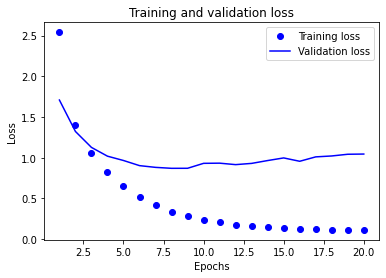

In [23]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 훈련과 검증 정확도 그리기

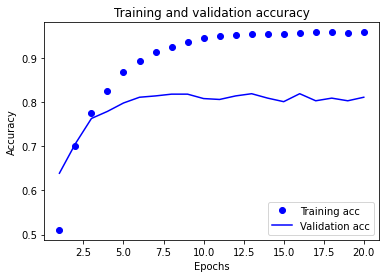

In [24]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 모델을 처음부터 다시 훈련하기
- 아홉번째 에포크 이후에 과대적합 시작함

In [25]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 58ms/step - loss: 2.5806 - accuracy: 0.4803 - val_loss: 1.7098 - val_accuracy: 0.6300
Epoch 2/9
16/16 [==============================] - 1s 48ms/step - loss: 1.4135 - accuracy: 0.7068 - val_loss: 1.3016 - val_accuracy: 0.7070
Epoch 3/9
16/16 [==============================] - 1s 57ms/step - loss: 1.0507 - accuracy: 0.7716 - val_loss: 1.1529 - val_accuracy: 0.7450
Epoch 4/9
16/16 [==============================] - 1s 56ms/step - loss: 0.8230 - accuracy: 0.8212 - val_loss: 1.0415 - val_accuracy: 0.7720
Epoch 5/9
16/16 [==============================] - 1s 55ms/step - loss: 0.6530 - accuracy: 0.8654 - val_loss: 0.9738 - val_accuracy: 0.8000
Epoch 6/9
16/16 [==============================] - 1s 51ms/step - loss: 0.5201 - accuracy: 0.8910 - val_loss: 0.9138 - val_accuracy: 0.8150
Epoch 7/9
16/16 [==============================] - 1s 51ms/step - loss: 0.4153 - accuracy: 0.9110 - val_loss: 0.8993 - val_accuracy: 0.8110
Epoch 8/9
16/16 [===

In [26]:
results

[0.988227903842926, 0.7880676984786987]

In [25]:
# 무작위로 분류하기
# 균형 잡힌 이진 분류 문제에서 완전히 무작위로 분류하면 50%
# 이 문제는 불균형한 데이터셋 사용하므로 무작위로 분류하면 18%

import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18432769367764915

## 새로운 데이터에 대해 예측하기

In [30]:
predictions = model.predict(x_test)

In [31]:
predictions[0].shape

(46,)

In [32]:
np.sum(predictions[0])

0.9999997

In [33]:
np.argmax(predictions[0])

3

## 레이블과 손실 다루기
- 레이블 인코딩하는 다른 방법: 정수 텐서로 변환
- 이 방식을 사용하려면 손실함수를 sparse_categorical_crossentropy 사용

In [36]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

## 충분히 큰 중간층을 두어야하는 이유
- 정보 병목: 마지막 출력이 46차원이기 때문에 중간층의 히든 유닛이 46개보다 적어서는 안된다
- 검증 정확도가 떨어지는 것을 확인할 수 있음
- 원인: 많은 정보를 중간층의 저차원 표현 공간으로 압축하려고 했기 때문에

In [37]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 25ms/step - loss: 3.4978 - accuracy: 0.0769 - val_loss: 3.2016 - val_accuracy: 0.1080
Epoch 2/20
63/63 [==============================] - 1s 22ms/step - loss: 2.8140 - accuracy: 0.2422 - val_loss: 2.5783 - val_accuracy: 0.3090
Epoch 3/20
63/63 [==============================] - 1s 23ms/step - loss: 2.1153 - accuracy: 0.3738 - val_loss: 1.9422 - val_accuracy: 0.6380
Epoch 4/20
63/63 [==============================] - 1s 23ms/step - loss: 1.5152 - accuracy: 0.6686 - val_loss: 1.6035 - val_accuracy: 0.6470
Epoch 5/20
63/63 [==============================] - 1s 23ms/step - loss: 1.2945 - accuracy: 0.6729 - val_loss: 1.5339 - val_accuracy: 0.6460
Epoch 6/20
63/63 [==============================] - 1s 23ms/step - loss: 1.1949 - accuracy: 0.6830 - val_loss: 1.4956 - val_accuracy: 0.6420
Epoch 7/20
63/63 [==============================] - 1s 22ms/step - loss: 1.1134 - accuracy: 0.7066 - val_loss: 1.4850 - val_accuracy: 0.6600
Epoch 8/20
63